In [1]:
import astropy.io.ascii as ascii
import Functions as AC
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [13]:
def data_gen(x,a,b,sigma):
    z = np.random.normal(0, sigma, 200) # defines our Gaussian random variable
    noise =z #equation for gaussian?
    return a*x+b+noise

In [51]:
x_list = np.random.uniform(-1, 1, 200)


In [52]:
y_list = data_gen(x_list, 1, 0, .1)

In [16]:
print(len(y))

200


In [17]:
x_train = x[:150]
x_val = x[150:200]
y_train = y[:150]
y_val = y[150:200]



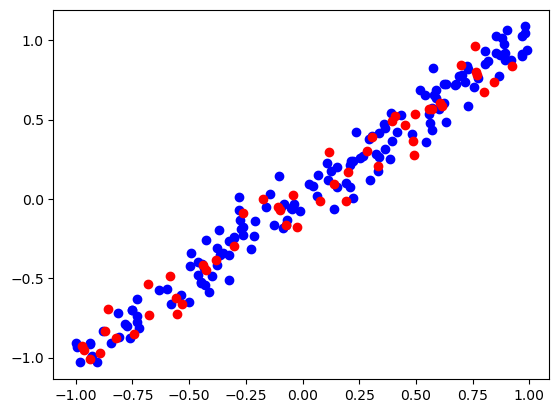

In [18]:
plt.scatter(x_train, y_train, color='b')
plt.scatter(x_val, y_val, color='r')

In [19]:
def dot_product(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    
    product = x1@x2
    return product

$y=xw_0+w_1=(x,1)\cdot (w_0, w_1)$

In [24]:


def Cost(y, label):
    return (y-label)**2

def transfert(x,W):
    return np.dot(np.array([x,1]),W)
    
def forward(x,W, label):
    Cost(transfert(x, W), label)


In [30]:
wo=w1=.3 
W = np.array([wo, w1])
y0=0
label=y0
x=0
y=transfert(x, W)
print("cost = " + str(Cost(y, label)))
print("y = "+ str(transfert(x, W)))

cost = 0.09
y = 0.3


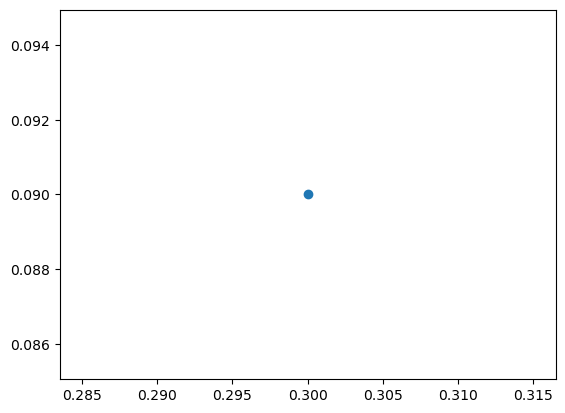

In [32]:
plt.scatter(y-label, Cost(y, label))

In [34]:
def dc_dy(y, label):
    return 2*(y-label)

def dy_dw(x):
    return np.array([x,1])

def dc_dw(y,label, x):
    return dc_dy(y,label)*dy_dw(x) 

In [40]:
y_train=transfert(x_train[0], W)

print('input', x_train[0])
print('weights', W)
print('neuron activation', y_train)
print('labels', label)
print('cost', Cost(y, label))

input 0.98920176051815
weights [0.3 0.3]
neuron activation 0.596760528155445
labels 0
cost 0.09


In [35]:
dc_dw(y, label, x)

array([0. , 0.6])

In [44]:
lam = 10**-2


In [81]:
def weight_update(W, lam, y, label, x):
    '''
    W = Weights to be updated
    lam = learning rate
    y = y
    label = y0
    x = x
    '''
    
    return W - lam * (dc_dw(y,label,x))


def train(W_init, lam, y_list, label_list, x_list, n_iters):
    W = W_init.copy()
    W_history = [W.copy()]  

    for ii in range(n_iters):
        y = y_list[ii]
        label = label_list[ii]
        x = x_list[ii]
        W = weight_update(W, lam, y, label, x)
        W_history.append(W.copy())  

    return np.array(W_history)  

In [67]:
w1 = weight_update(W, lam, y, label, x)
w2 = weight_update(w1, lam, y, label, x)
w3 = weight_update(w2, lam, y, label, x)
w4 = weight_update(w3, lam, y, label, x)
w5 = weight_update(w4, lam, y, label, x)
w6 = weight_update(w5, lam, y, label, x)
w7 = weight_update(w6, lam, y, label, x)
w8 = weight_update(w7, lam, y, label, x)


wii = np.array([W, w1, w2, w3, w4, w5, w6, w7, w8])

In [78]:
Y = []
for ii in range(len(wii)):    
    y=transfert(x, wii[ii])
    Y.append(y)
print("cost = " + str(Cost(y, label)))
print("y = "+ str(transfert(x, W)))


labels = np.array([label, label,label,label,label,label,label,label,label])

cost = [0.0674337 0.0674337 0.0674337 0.0674337 0.0674337 0.0674337 0.0674337
 0.0674337 0.0674337]
y = 0.3


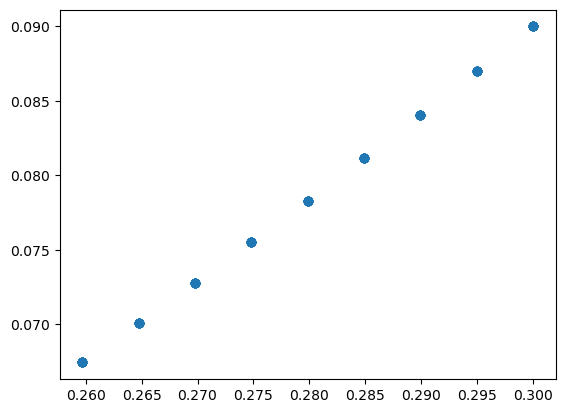

In [75]:
plt.scatter(Y-labels, Cost(Y, labels))